In [2]:
## USE for Multi GPU Systems
#import os
#os.environ["CUDA_VISIBLE_DEVICES"]="0"

import numpy as np
import pandas as pd

import tensorflow as tf

# Importing SK-learn to calculate precision and recall
import sklearn
from sklearn import metrics

target_names = ["Knuckle", "Finger"]

In [3]:
# the data, split between train and test sets
df = pd.read_pickle("DataStudyEvaluation/df_blobs_area.pkl")

In [4]:
df.userID.unique()

array([ 1,  3,  5,  6,  7,  8,  9, 10, 11, 12])

In [5]:
x = np.vstack(df.Blobs)
x = x.reshape(-1, 27, 15, 1)

In [6]:
# convert class vectors to binary class matrices (one-hot notation)
num_classes = 2
y = utils.to_categorical(df.InputMethod, num_classes)

Text(0.5, 1.0, 'Label for image 1 is: [1. 0.]')

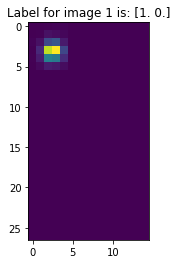

In [7]:
i = 1
plt.imshow(x[i].reshape(27, 15)) #np.sqrt(784) = 28
plt.title("Label for image %i is: %s" % (i, y[i]))

In [8]:
# If GPU is not available: 
# GPU_USE = '/cpu:0'
#config = tf.ConfigProto(device_count = {"GPU": 1})


# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allow_growth=True
config.gpu_options.allocator_type = 'BFC'

# Limit the maximum memory used
config.gpu_options.per_process_gpu_memory_fraction = 0.4

# set session config
tf.keras.backend.set_session(tf.Session(config=config))

In [11]:
loadpath = "./ModelSnapshots/CNN-33767.h5"
model = tf.keras.models.load_model(loadpath)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [12]:
%%time
lst = []
batch = 100
for i in range(0, len(x), batch):
    _x = x[i: i+batch]
    lst.extend(model.predict(_x))

CPU times: user 14.2 s, sys: 1.25 s, total: 15.5 s
Wall time: 11 s


In [13]:
df["InputMethodPred"] = lst
df.InputMethodPred = df.InputMethodPred.apply(lambda x: np.argmax(x))

In [14]:
df_eval = df

In [15]:
print(sklearn.metrics.confusion_matrix(df_eval.InputMethod.values, df_eval.InputMethodPred.values, labels=[0, 1]))
cm = sklearn.metrics.confusion_matrix(df_eval.InputMethod.values, df_eval.InputMethodPred.values, labels=[0, 1], )
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)
print("Accuray: %.3f" % sklearn.metrics.accuracy_score(df_eval.InputMethod.values, df_eval.InputMethodPred.values))
print("Recall: %.3f" % metrics.recall_score(df_eval.InputMethod.values, df_eval.InputMethodPred.values, average="macro"))
print("Precision: %.3f" % metrics.average_precision_score(df_eval.InputMethod.values, df_eval.InputMethodPred.values, average="macro"))
print("F1-Score: %.3f" % metrics.f1_score(df_eval.InputMethod.values, df_eval.InputMethodPred.values, average="macro"))
print(sklearn.metrics.classification_report(df_eval.InputMethod.values, df_eval.InputMethodPred.values, target_names=target_names))

[[21071  3651]
 [ 2096 57783]]
[[0.85231777 0.14768223]
 [0.03500392 0.96499608]]
Accuray: 0.932
Recall: 0.909
Precision: 0.932
F1-Score: 0.916
              precision    recall  f1-score   support

     Knuckle       0.91      0.85      0.88     24722
      Finger       0.94      0.96      0.95     59879

    accuracy                           0.93     84601
   macro avg       0.93      0.91      0.92     84601
weighted avg       0.93      0.93      0.93     84601

